# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [115]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1200)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count


In [116]:
# URL building

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [117]:
len(cities)

550

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [127]:
# Used for testing a single loop
# testCity = ["New York City"]
# response = requests.get(query_url + "New York City").json()
# response
# countryTemp = (response['sys']['country'])
# countryTemp

'US'

In [129]:
# making lists for the dataframe
cityName = []
cityId = []
lat = []
lon = []
temp = []
humid = []
cloud = []
wind = []
country = []


for city in cities:
    try:
        
    
      # this line is essential to the code but I got dinged for my api key running to many queries  
        response = requests.get(query_url + city).json()
      # Uncomment for submission
    
    
        # Using a temp variable so I am not appending full data for each city
        # If all the data exist THEN allow the lists to be appended
        cityNameTemp = city
        latTemp = (response['coord']['lat'])
        lonTemp = (response['coord']['lon'])
        tempTemp = (response['main']['temp'])
        humidTemp = (response['main']['humidity'])
        cloudTemp = (response['clouds']['all'])
        windTemp = (response['wind']['speed'])
        countryTemp = (response['sys']['country'])
        # Print out City and ID
        print(city)
        print(response['weather'][0]['id'])
        
        
        cityName.append(cityNameTemp)
        lat.append(latTemp)
        lon.append(lonTemp)
        temp.append(tempTemp)
        humid.append(humidTemp)
        cloud.append(cloudTemp)
        wind.append(windTemp)
        country.append(countryTemp)
    except KeyError:
        count = 1
        
data={"City":cityName,
    "Latitude":lat,
    "Longitude":lon,
    "Temperature":temp,
    "Humidity":humid,
    "Cloudiness":cloud,
    "Wind Speed":wind,
    "Country":country
     }
    
weatherCities = pd.DataFrame(data)

weatherCities.head()

matagami
802
kalmunai
803
albany
521
puerto ayora
802
dikson
802
port elizabeth
801
amberley
802
cape town
801
barrow
600
nikolskoye
802
qaanaaq
804
norman wells
803
rikitea
500
hithadhoo
500
begusarai
802
placido de castro
501
avarua
803
saint-michel-des-saints
600
kapaa
803
coruripe
803
iracoubo
802
banjar
202
ushuaia
801
mar del plata
801
mataura
500
souillac
802
fortuna
803
gizo
500
california city
800
jamestown
500
itaqui
800
grindavik
803
santa cruz
803
ladario
800
georgetown
500
faanui
802
punta arenas
804
lagoa
500
conde
803
asau
804
lorengau
804
oskemen
741
grants
800
puqi
800
roura
801
denia
500
san vicente
800
isangel
804
hualmay
800
khatanga
800
vaini
803
miandrivazo
801
busselton
802
ozinki
500
esperantina
804
port hedland
803
hit
800
chara
801
nemuro
804
imeni poliny osipenko
800
lai
800
victoria
804
cidreira
800
mount gambier
804
vila franca do campo
521
pingzhuang
804
saskylakh
804
hermanus
804
upernavik
800
north bend
804
nuuk
611
bongandanga
801
aryanah
801
abu samrah

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country
0,matagami,49.75,-77.63,-6.00,37,40,5.10,CA
1,kalmunai,7.42,81.82,28.03,75,66,2.32,LK
2,albany,42.60,-73.97,5.49,33,75,5.10,US
3,puerto ayora,-0.74,-90.35,27.90,66,40,8.20,EC
4,dikson,73.51,80.55,-14.74,81,26,2.80,RU


### Convert Raw Data to DataFrame
* Export the city data into a .csv.y
* Display the DataFrame

In [130]:
# cityName = ['hermanus', 'arraial do cabo', 'busselton', 'yellowknife', 'korfovskiy', 'rikitea', 'noumea', 'ormara', 'ushuaia', 'quelimane', 'avarua', 'souillac', 'afsin', 'mataura', 'teya', 'hobart', 'raudeberg', 'petropavlovskaya', 'peniche', 'tallahassee', 'karabulak', 'castro', 'cape town', 'komsomolskiy', 'patea', 'barentsburg', 'gat', 'edd', 'fatikchhari', 'campbell river', 'addis abeba', 'airai', 'dikson', 'severo-kurilsk', 'carnarvon', 'tumannyy', 'kieta', 'faanui', 'taolanaro', 'georgetown', 'bluff', 'halifax', 'margate', 'saint george', 'paidha', 'punta arenas', 'shingu', 'avera', 'belushya guba', 'saskylakh', 'puerto escondido', 'hilo', 'kushmurun', 'nuuk', 'bosaso', 'sulangan', 'tianpeng', 'atuona', 'tazovskiy', 'bredasdorp', 'vaini', 'bethel', 'kenai', 'rungata', 'hambantota', 'tsihombe', 'marcona', 'channel-port aux basques', 'zeya', 'puerto ayora', 'hamilton', 'syracuse', 'mahebourg', 'meyungs', 'lompoc', 'bulata', 'illoqqortoormiut', 'port alfred', 'mount isa', 'snasa', 'clyde river', 'saint-joseph', 'barrow', 'falaleu', 'hirara', 'gberia fotombu', 'kuchinarai', 'balkhash', 'geraldton', 'opuwo', 'tasiilaq', 'ixtapa', 'pombas', 'beyneu', 'port lincoln', 'baghdad', 'yar-sale', 'moindou', 'ostrovnoy', 'new norfolk', 'thabazimbi', 'luan', 'agirish', 'saint-philippe', 'cidreira', 'longyearbyen', 'banjar', 'albany', 'hasaki', 'tabiauea', 'bengkulu', 'tiksi', 'grand river south east', 'sibolga', 'ribeira grande', 'hwange', 'armacao dos buzios', 'katsuura', 'norman wells', 'vestmannaeyjar', 'pangnirtung', 'aswan', 'lebu', 'olafsvik', 'matsusaka', 'aykhal', 'luoyang', 'butaritari', 'sao filipe', 'kapaa', 'sao raimundo nonato', 'talnakh', 'wahpeton', 'calvinia', 'tautira', 'pochutla', 'rabaul', 'esso', 'tulun', 'quatre cocos', 'east london', 'flinders', 'port elizabeth', 'one hundred mile house', 'beneditinos', 'constitucion', 'brewster', 'praia da vitoria', 'pak phanang', 'nanortalik', 'pangkalanbuun', 'yulara', 'cookshire', 'khatanga', 'nikolskoye', 'kodiak', 'chuy', 'udachnyy', 'rio gallegos', 'leshukonskoye', 'pisco', 'papara', 'iqaluit', 'palabuhanratu', 'saleaula', 'esperance', 'coihaique', 'dukat', 'libenge', 'vostok', 'khorixas', 'salinas', 'grand gaube', 'kaitangata', 'duz', 'nome', 'kajaani', 'merrill', 'guajara-mirim', 'narsaq', 'tuatapere', 'najran', 'chokurdakh', 'mehamn', 'ouro preto do oeste', 'shalinskoye', 'singarayakonda', 'lorengau', 'jamestown', 'samalaeulu', 'bohdan', 'nemuro', 'vaitupu', 'nizhniy tsasuchey', 'tilichiki', 'ibipeba', 'leeton', 'lazaro cardenas', 'san cristobal', 'maceio', 'sentyabrskiy', 'matara', 'kegayli', 'neuquen', 'charagua', 'osoyoos', 'lipin bor', 'qaanaaq', 'kavaratti', 'bubaque', 'tabarqah', 'ilebo', 'khorramshahr', 'moree', 'baruun-urt', 'saldanha', 'capitan bado', 'semnan', 'pacific grove', 'amderma', 'olean', 'santa fe', 'bambous virieux', 'havre-saint-pierre', 'sungaipenuh', 'haines junction', 'mugango', 'karratha', 'samarai', 'ballina', 'verkhnevilyuysk', 'nizhneyansk', 'lagoa', 'turukhansk', 'san jose', 'dingle', 'shunyi', 'kysyl-syr', 'trincomalee', 'thompson', 'gravelbourg', 'malakal', 'ojinaga', 'malazgirt', 'bonavista', 'cabo san lucas', 'kutum', 'araouane', 'hoa binh', 'shaoyang', 'shimorskoye', 'corn island', 'craigieburn', 'akdepe', 'haibowan', 'nouakchott', 'cividale del friuli', 'bongandanga', 'kalabo', 'luderitz', 'attawapiskat', 'te anau', 'comodoro rivadavia', 'gimbi', 'hithadhoo', 'padang', 'provideniya', 'berlevag', 'goderich', 'kaduqli', 'sabinopolis', 'riverton', 'kilindoni', 'san patricio', 'cam pha', 'rawson', 'le mars', 'puerto princesa', 'mulanje', 'mys shmidta', 'broken hill', 'santa comba', 'lavrentiya', 'owatonna', 'asau', 'umzimvubu', 'tura', 'bocas del toro', 'sisimiut', 'ahipara', 'tavistock', 'empangeni', 'lolua', 'plaza de caisan', 'tabou', 'novaya igirma', 'san carlos del zulia', 'nyurba', 'marawi', 'nabire', 'kruisfontein', 'tuktoyaktuk', 'blagoyevo', 'valparai', 'lasa', 'merauke', 'muros', 'milkovo', 'bom jesus do itabapoana', 'southbridge', 'panaytayon', 'coquimbo', 'palmer', 'yining', 'chumikan', 'suntar', 'shache', 'demba', 'monte alegre', 'victoria', 'portland', 'upernavik', 'roswell', 'blythe', 'mnogovershinnyy', 'dubbo', 'ewo', 'lowestoft', 'san quintin', 'lodwar', 'aklavik', 'gamba', 'palasa', 'rocha', 'yerofey pavlovich', 'fortuna', 'china', 'hihifo', 'port hardy', 'creel', 'half moon bay', 'pevek', 'labuhan', 'leeuwarden', 'iranshahr', 'payson', 'barabai', 'ekhabi', 'tevriz', 'warrnambool', 'funadhoo', 'camopi', 'lujiang', 'kirksville', 'ancud', 'kampot', 'lashio', 'ngemplak', 'naze', 'miyazu', 'russkaya polyana', 'warqla', 'cherskiy', 'kloulklubed', 'kayes', 'sinnamary', 'vanimo', 'torbay', 'leningradskiy', 'lubao', 'lata', 'bossembele', 'mata', 'chitradurga', 'tubuala', 'waitati', 'kichera', 'ilulissat', 'beringovskiy', 'sioux lookout', 'mende', 'abancay', 'am timan', 'itarema', 'tiarei', 'labuan', 'khonuu', 'mala bilozerka', 'isiro', 'oussouye', 'vanavara', 'nassau', 'kpandu', 'mar del plata', 'meulaboh', 'novoseleznevo', 'wellington', 'cotacachi', 'madison', 'walvis bay', 'axim', 'bandarbeyla', 'oistins', 'san vicente', 'matamoros', 'karlskoga', 'kupang', 'northam', 'tomatlan', 'ajdabiya', 'nepa nagar', 'balikpapan', 'namie', 'geresk', 'santa rosa', 'kavieng', 'ahuatempan', 'georgiyevka', 'karamea', 'boddam', 'talcahuano', 'velasco ibarra', 'ponta do sol', 'oxford', 'zaysan', 'east angus', 'puerto del rosario', 'chapais', 'alta floresta', 'razole', 'amuntai', 'dongkan', 'sao gabriel da cachoeira', 'kalagarh', 'port augusta', 'dawlatabad', 'solnechnyy', 'birao', 'mitzic', 'alyangula', 'sibu', 'collie', 'cadillac', 'oktyabrskiy', 'cayenne', 'waiuku', 'dubenskiy', 'durres', 'sur', 'poum', 'bhatkal', 'kon tum', 'kazalinsk', 'sussex', 'krasnoselkup', 'zyryanka', 'arman', 'san ignacio', 'port blair', 'oswego', 'tual', 'fort nelson', 'louisbourg', 'davila', 'disna', 'dodge city', 'hami', 'puntarenas', 'hukay', 'salalah', 'bathsheba', 'zhanakorgan', 'bridlington', 'eskasem', 'kachiry', 'rock sound', 'touros', 'rybinsk', 'tierralta', 'moroni', 'kuito', 'port hawkesbury', 'marion', 'wakkanai', 'asyut', 'sebezh', 'bima', 'manoharpur', 'jumla', 'cuicatlan', 'dalmau', 'tambul', 'madang', 'pinsk', 'la ciotat', 'sturgeon bay', 'saint-pierre', 'teknaf', 'atotonilco el grande', 'hope mills', 'abu jubayhah', 'jaru', 'vardo', 'chiredzi', 'bazarnyye mataki', 'ambilobe', 'mana', 'upata', 'krasnogvardeyets', 'bali', 'kalevala', 'gejiu', 'toyooka', 'hay river', 'ongwediva', 'manta', 'mweka', 'luchegorsk', 'eureka', 'bac giang', 'dupnica', 'tigil', 'rio grande', 'wucheng', 'imeni poliny osipenko', 'taoudenni', 'hobyo', 'fort saint james', 'caldwell', 'abalak', 'tuy hoa', 'alice springs', 'sitka', 'nelson bay', 'nalgonda', 'voh', 'lima', 'atar', 'vila', 'eenhana', 'tambacounda', 'krutinka', 'howard springs', 'harper', 'zapolyarnyy', 'fuyang', 'erdemli', 'manokwari', 'huicungo', 'inhambane', 'yangjiang', 'mission bend', 'ramasukha', 'samusu', 'ola', 'manzhouli', 'daru', 'palu', 'gambela', 'kahului', 'barcelos', 'grand forks', 'santiago', 'zolotinka', 'hualmay', 'badarganj', 'promysla', 'tibati', 'knyaze-volkonskoye', 'mirandopolis', 'iracoubo', 'kamenskoye', 'puerto ayacucho', 'wanxian', 'bulacan', 'beaumont', 'sao joao da barra', 'dzhusaly', 'ascension', 'jalu', 'qasigiannguit', 'doctor arroyo', 'saint anthony', 'marsh harbour', 'soloneshnoye', 'toropets', 'nadym', 'shimoda', 'ahuimanu', 'la seyne-sur-mer', 'nenagh', 'las choapas', 'hunza', 'nguiu', 'kerouane', 'zabid', 'chiang rai', 'mahibadhoo', 'pindwara', 'christchurch', 'shetpe', 'kyaukse', 'bitlis', 'mugur-aksy', 'roald']



In [133]:
weatherCities.to_csv('cities.csv')


In [134]:
weatherCities.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country
0,matagami,49.75,-77.63,-6.00,37,40,5.10,CA
1,kalmunai,7.42,81.82,28.03,75,66,2.32,LK
2,albany,42.60,-73.97,5.49,33,75,5.10,US
3,puerto ayora,-0.74,-90.35,27.90,66,40,8.20,EC
4,dikson,73.51,80.55,-14.74,81,26,2.80,RU


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [135]:
#  Get the indices of cities that have humidity over 100%.
print(len(weatherCities))
TooHumid = weatherCities[weatherCities.Humidity>100]                         
notTooHumid = weatherCities[weatherCities.Humidity<=100]                         
len(notTooHumid)

508


508

In [136]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Though I get what you're trying to make me do I burned a bunch of time trying to get it done when I can do it
# on one line.  If I have the time I'll come back and fix it up
notTooHumid = weatherCities[weatherCities.Humidity<=100]

In [137]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
notTooHumid.to_csv('cities.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

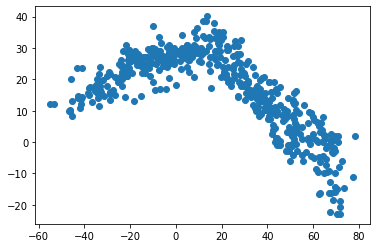

In [138]:
plt.scatter(notTooHumid.Latitude, notTooHumid.Temperature)


## Latitude vs. Humidity Plot

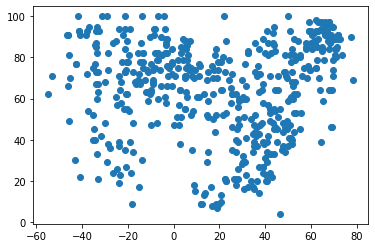

In [139]:
plt.scatter(notTooHumid.Latitude, notTooHumid.Humidity)

## Latitude vs. Cloudiness Plot

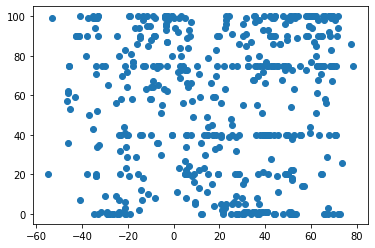

In [140]:
plt.scatter(notTooHumid.Latitude, notTooHumid.Cloudiness)

## Latitude vs. Wind Speed Plot

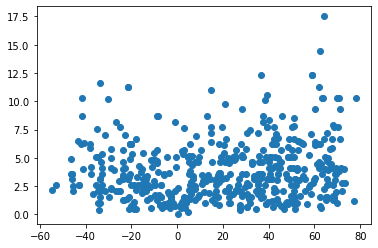

In [141]:
plt.scatter(notTooHumid.Latitude, notTooHumid["Wind Speed"])

## Linear Regression

In [142]:
# OPTIONAL: Create a function to create Linear Regression plots

In [143]:
# Create Northern and Southern Hemisphere DataFrames
notTooHumidNorth = notTooHumid[notTooHumid.Latitude>=0]
notTooHumidSouth = notTooHumid[notTooHumid.Latitude<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [144]:
notTooHumid.head(20)

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country
0,matagami,49.75,-77.63,-6.00,37,40,5.10,CA
1,kalmunai,7.42,81.82,28.03,75,66,2.32,LK
2,albany,42.60,-73.97,5.49,33,75,5.10,US
3,puerto ayora,-0.74,-90.35,27.90,66,40,8.20,EC
4,dikson,73.51,80.55,-14.74,81,26,2.80,RU
5,port elizabeth,-33.92,25.57,16.00,87,19,1.00,ZA
6,amberley,39.20,-84.43,10.64,27,40,7.70,US
7,cape town,-33.93,18.42,16.99,67,20,3.10,ZA
8,barrow,71.29,-156.79,-8.00,85,90,9.30,US
9,nikolskoye,59.70,30.79,1.39,74,44,3.00,RU


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression